In [1]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Atin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Atin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Atin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Atin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Atin\AppData\Roaming\nltk_data...
[nltk_

True

In [2]:
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [3]:
# from google.colab import files

# uploaded = files.upload()

In [4]:
df = pd.read_csv('Student_Responses.csv')

In [5]:
print(df.columns)


Index(['Timestamp', 'Which part of Math is terrifying for you? ',
       'Do you feel that unavailability of good Math teacher is a reason behind your fear of math?  ',
       'Do you get frustrated or frightened when you fail to solve problems repeatedly?',
       'Do you feel rote learning of mathematics increase Math phobia?',
       'Do you have Dyscalculia?',
       'Do you think psychological disorder is one of the reasons behind Math phobia?',
       'Do you think lack of concentration is one of the reasons behind your fear of math?',
       'Do you think unclear concepts of the topics are the reasons behind Math phobia?',
       'Do you think Yoga can solve the Math phobia? ',
       'Do you think Math phobia is caused due to the pressure of performing well?',
       'Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world?',
       'Do you agree that regular practice of Mathematics can solve the problems related to Math phobia?

In [6]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# apply get_sentiment function

df['sentiment'] = df['Does breaking up a complicated problem into smaller part help in betterment?'].apply(get_sentiment)

df.head(10)

,Timestamp,Which part of Math is terrifying for you?,Do you feel that unavailability of good Math teacher is a reason behind your fear of math?,Do you get frustrated or frightened when you fail to solve problems repeatedly?,Do you feel rote learning of mathematics increase Math phobia?,Do you have Dyscalculia?,Do you think psychological disorder is one of the reasons behind Math phobia?,Do you think lack of concentration is one of the reasons behind your fear of math?,Do you think unclear concepts of the topics are the reasons behind Math phobia?,Do you think Yoga can solve the Math phobia?,Do you think Math phobia is caused due to the pressure of performing well?,Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world?,Do you agree that regular practice of Mathematics can solve the problems related to Math phobia?,Does breaking up a complicated problem into smaller part help in betterment?,Does studying in peer groups and seeking help from teacher help to eradicate Math phobia?,Does frequent mock tests help to release the pressure?,Positive,sentiment
0,5/13/2023 12:00:08,Arithmetic,Strongly Agree,Strongly Agree,Moderately Agree,Not at all,Not yet decided,Moderately Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Moderately Agree,Moderately Agree,Moderately Agree,Sometimes,Not yet decided,0,1
1,5/13/2023 20:10:44,All of the above,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree,0,1
2,5/14/2023 11:19:41,Algebra,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Disagree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree,0,1
3,5/14/2023 11:27:17,Trigonometry,Strongly Agree,Not yet decided,Moderately Disagree,None of the above,Moderately Agree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Moderately Agree,0,1
4,5/14/2023 11:53:46,All of the above,Moderately Disagree,Strongly Agree,Not yet decided,"Yes, I suffered",Moderately Agree,Moderately Disagree,Moderately Agree,Not yet decided,Moderately Disagree,Strongly Disagree,Moderately Disagree,Not yet decided,Yes,Moderately Agree,0,0
5,5/14/2023 12:06:15,Arithmetic,Moderately Agree,Strongly Agree,Moderately Agree,Some times,Moderately Agree,Moderately Agree,Strongly Agree,Strongly Agree,Moderately Agree,Moderately Agree,Strongly Agree,Strongly Agree,Sometimes,Moderately Agree,0,1
6,5/14/2023 12:35:27,All of the above,Strongly Agree,Moderately Agree,Strongly Agree,Not at all,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Moderately Agree,Strongly Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree,0,1
7,5/14/2023 12:42:39,Geometry,Strongly disagree,Strongly Disagee,Strongly Disagree,Not at all,Not yet decided,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,never,Stongly Agree,1,1
8,5/14/2023 12:51:13,Algebra,Strongly Agree,Moderately Agree,Not yet decided,"No, I didn't",Not yet decided,Strongly Agree,Strongly Agree,Not yet decided,Moderately Agree,Moderately Agree,Strongly Agree,Strongly Agree,Yes,Stongly Agree,1,1
9,5/14/2023 12:57:31,Arithmetic,Moderately Agree,Strongly Agree,Moderately Agree,Some times,Strongly Agree,Strongly Agree,Moderately Agree,Moderately Disagree,Moderately Disagree,Strongly Agree,Strongly Agree,Moderately Agree,Yes,Moderately Disagree,0,1


In [7]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Positive'], df['sentiment']))

[[13 45]
 [ 3 45]]


In [8]:
from sklearn.metrics import classification_report

print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.81      0.22      0.35        58
           1       0.50      0.94      0.65        48

    accuracy                           0.55       106
   macro avg       0.66      0.58      0.50       106
weighted avg       0.67      0.55      0.49       106



<Axes: >

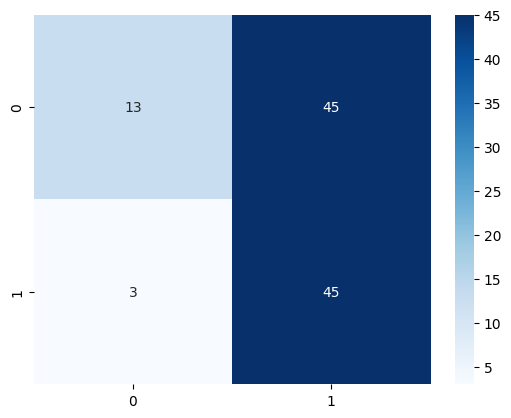

In [9]:
import seaborn as sns
sns.heatmap(confusion_matrix(df['Positive'], df['sentiment']), annot=True, fmt='d', cmap='Blues')

In [10]:
display(df.head(5))

,Timestamp,Which part of Math is terrifying for you?,Do you feel that unavailability of good Math teacher is a reason behind your fear of math?,Do you get frustrated or frightened when you fail to solve problems repeatedly?,Do you feel rote learning of mathematics increase Math phobia?,Do you have Dyscalculia?,Do you think psychological disorder is one of the reasons behind Math phobia?,Do you think lack of concentration is one of the reasons behind your fear of math?,Do you think unclear concepts of the topics are the reasons behind Math phobia?,Do you think Yoga can solve the Math phobia?,Do you think Math phobia is caused due to the pressure of performing well?,Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world?,Do you agree that regular practice of Mathematics can solve the problems related to Math phobia?,Does breaking up a complicated problem into smaller part help in betterment?,Does studying in peer groups and seeking help from teacher help to eradicate Math phobia?,Does frequent mock tests help to release the pressure?,Positive,sentiment
0,5/13/2023 12:00:08,Arithmetic,Strongly Agree,Strongly Agree,Moderately Agree,Not at all,Not yet decided,Moderately Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Moderately Agree,Moderately Agree,Moderately Agree,Sometimes,Not yet decided,0,1
1,5/13/2023 20:10:44,All of the above,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree,0,1
2,5/14/2023 11:19:41,Algebra,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Disagree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree,0,1
3,5/14/2023 11:27:17,Trigonometry,Strongly Agree,Not yet decided,Moderately Disagree,None of the above,Moderately Agree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Moderately Agree,0,1
4,5/14/2023 11:53:46,All of the above,Moderately Disagree,Strongly Agree,Not yet decided,"Yes, I suffered",Moderately Agree,Moderately Disagree,Moderately Agree,Not yet decided,Moderately Disagree,Strongly Disagree,Moderately Disagree,Not yet decided,Yes,Moderately Agree,0,0


In [11]:
import matplotlib.pyplot as plt

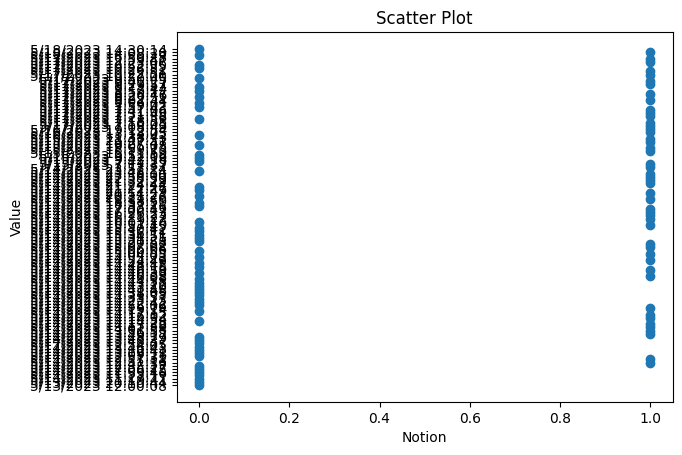

In [12]:
plt.scatter(df['Positive'], df['Timestamp'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Notion')
plt.ylabel('Value')

plt.show()

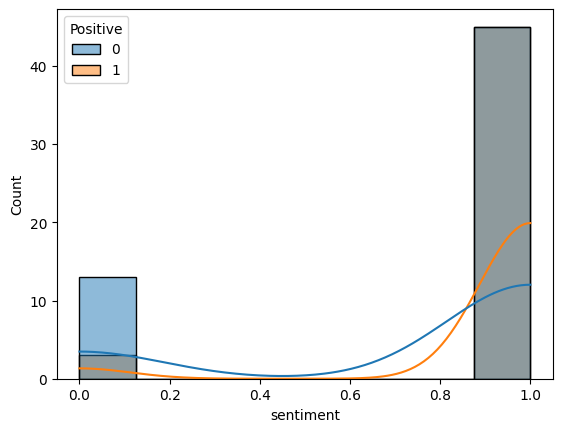

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.histplot(x='sentiment', data=df, kde=True, hue='Positive')

plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.81      0.22      0.35        58
           1       0.50      0.94      0.65        48

    accuracy                           0.55       106
   macro avg       0.66      0.58      0.50       106
weighted avg       0.67      0.55      0.49       106



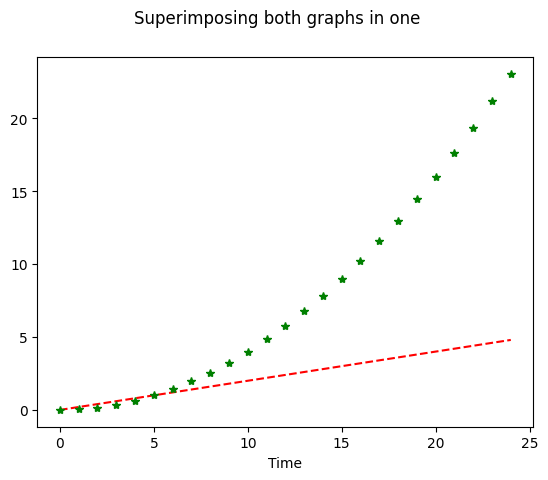

In [15]:
import matplotlib.pyplot as plt
import numpy as np
t=np.arange(0, 5, 0.2)

plt.plot(t, "r--")
plt.plot(t**2, "g*")

plt.xlabel("Time")
plt.suptitle("Superimposing both graphs in one")
plt.show()

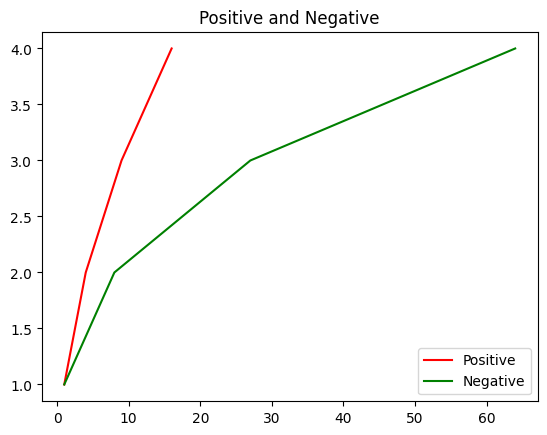

In [16]:
t = np.array([1,2,3,4])

plt.plot(t**2,t, color='red',label='Positive')
plt.plot(t**3,t, color='green',label='Negative')

plt.title("Positive and Negative")
plt.legend()
plt.show()

In [17]:
# from google.colab import files

# uploaded = files.upload()

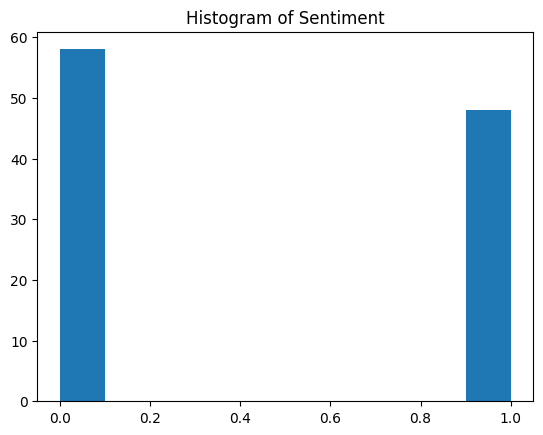

In [18]:
# Creating a histogram
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Student_Responses.csv')
plt.hist(df['Positive'])
plt.title('Histogram of Sentiment')
plt.show()

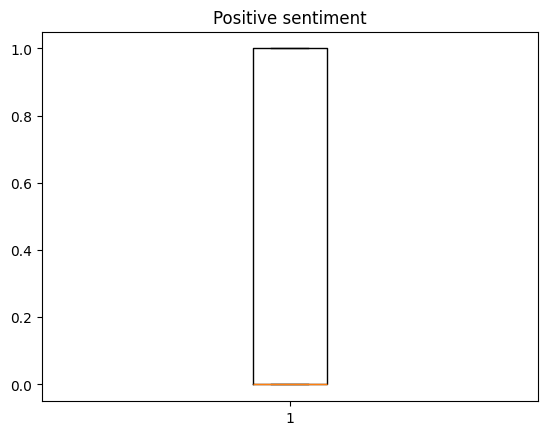

In [19]:
sentiment1 = df.dropna()
# Creating a box plot
plt.boxplot(sentiment1['Positive'])
plt.title('Positive sentiment')
plt.show()

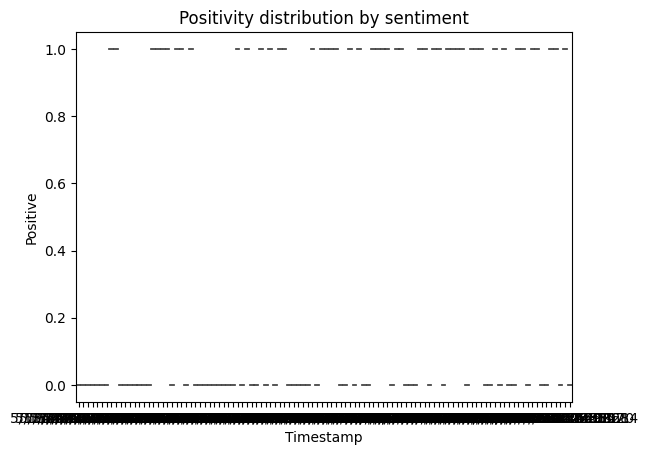

In [20]:
import seaborn as sns
sns.violinplot(data=df, x='Timestamp', y='Positive')
plt.title('Positivity distribution by sentiment')
plt.show()